# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Multiple Linear Regression</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

# Multiple Linear Regression and Regression Error Metrics¶

In [ ]:
# y = b0 + b1X1 + b2X2 + b3X3    multiple linear regress.

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (8, 4)

import warnings
warnings.filterwarnings("ignore")

## Read Data Set

In [ ]:
df = pd.read_csv("Advertising.csv")
df

## Data Preparation -  EDA

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull()

In [ ]:
df.isnull().sum()

In [ ]:
# !pip install missingno  
# eksik verilerin yapısını ve dagılımını görselleştirir

In [ ]:
import missingno as msno

In [ ]:
msno.matrix(df);

In [ ]:
# altta örnek null hucreleri olan bir resim (farklı bir data setinden alınmıştır)

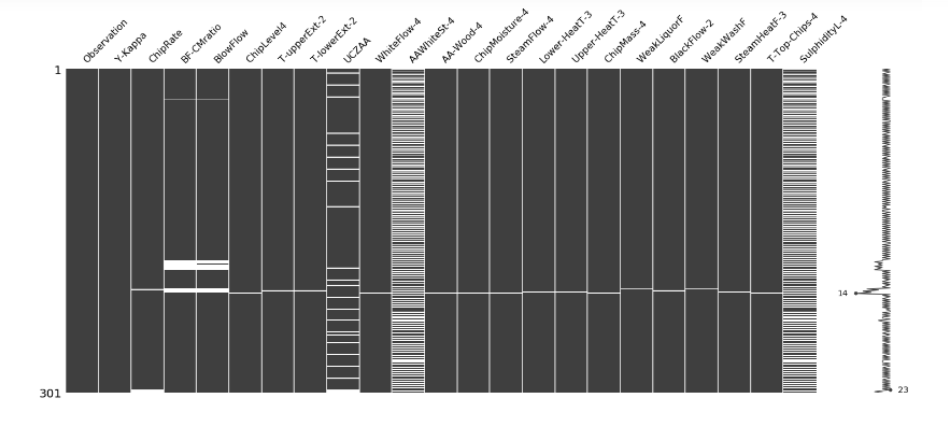

In [ ]:
df.describe().T

In [ ]:
# data setini özetleyen bir kütüphane
#!pip install summarytools

In [ ]:
from summarytools import dfSummary
dfSummary(df)

In [ ]:
# mean ve Std değerlerinin birbirine yakınlığının outlier tespitindeki önemi hakkında bir örnek

print ( np.mean([100,110,120,115]))
print ( np.std([100,110,120,115]))

In [ ]:
print ( np.mean([100,110,120,700]))
print ( np.std([100,110,120,700]))

In [ ]:
print ( np.mean([100,110,120,900]))
print ( np.std([100,110,120,900]))

In [ ]:
sns.pairplot(df);

In [ ]:
sns.heatmap(df.corr(), annot=True);

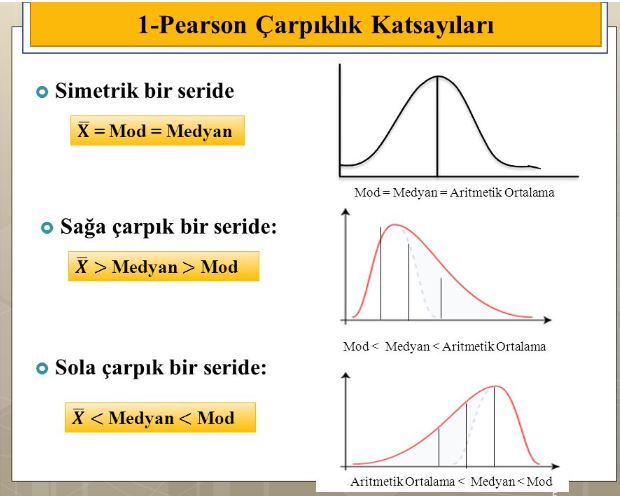

In [ ]:
from scipy.stats import skew

In [ ]:
# skewness tespiti için bir döngü
for i in df.drop(columns = "sales").columns:
    print(i, skew(df[i]))

# sales sütunu haricindeki tüm feature ların skewness degerini hesaplar

 - -1 ile + 1 arasındaki skewness degerlerinde dagılımın kabaca simetrik oldugu kabul edilebilir

In [ ]:
for j in df.drop(columns = "sales").columns:     #"sales" sütunu dataframe'den kaldırılıyor
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))   #  j sütununa ait veri dağılımı grafiği çiziliyor. grafiğin üzerinde gösterilen etiketi oluşturur. Etiket, o sütunun çarpıklık değerini (skewness) içerir
    g = g.legend(loc= "best")   #  grafiğin üzerine eklenen etiketin konumunu en iyi yere yerleştirmes
    plt.show()

In [ ]:
df.corr()   #correlation bakalım

In [ ]:
 !pip install ipywidgets ydata-profiling

In [27]:
# load the ydata_profiling package
from ydata_profiling import ProfileReport

In [28]:
# use ProfileReport
pr_df = ProfileReport(df)

In [29]:
# show pr_df
pr_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Train-Test Split

In [30]:
# ML için kullanılan kütüphane Scikit-Learn kütüphanesidir

!pip install scikit-learn 
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [31]:
 X = df.drop(columns="sales")  # df[["TV", "radio", "newspaper"]] , Indep.variable'lar X e atandı
y = df["sales"]  # modelimin önüne hedef olarak target variable mı atadım.
print(X,y)

        TV  radio  newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns] 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64


In [32]:
from sklearn.model_selection import train_test_split
#Veri setinizi randomly olarak eğitim (training) ve test (testing) alt kümelerine ayırmak için kullanılır.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

X_train: Eğitim veri setinin özelliklerini (features) içerir.

X_test: Test veri setinin özelliklerini (features) içerir.

y_train: Eğitim veri setinin etiketlerini (labels/targets) içerir.

y_test: Test veri setinin etiketlerini (labels/targets) içerir.

train_test_split(X, y, test_size=0.3, random_state=42): Bu fonksiyon çağrısı ile X (özellikler) ve y (etiketler) veri setleri rastgele olarak eğitim ve test alt kümelerine ayrılır.

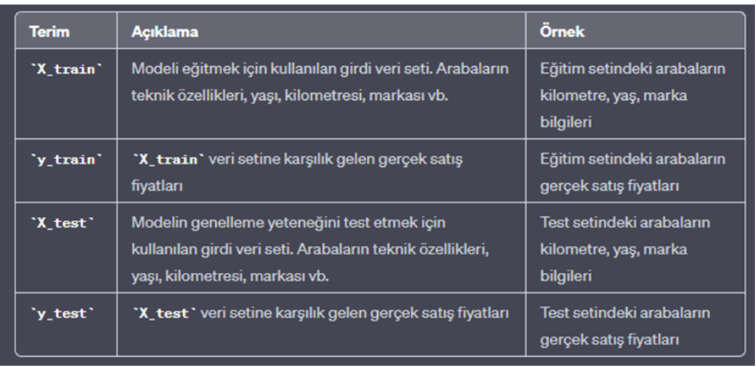

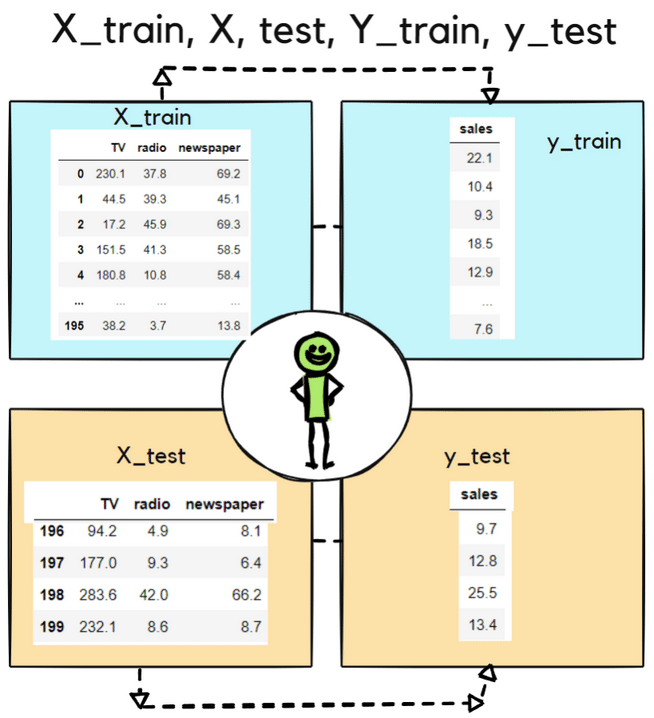

In [34]:
df.sample(15)

,TV,radio,newspaper,sales
29,70.6,16.0,40.8,10.5
198,283.6,42.0,66.2,25.5
64,131.1,42.8,28.9,18.0
76,27.5,1.6,20.7,6.9
176,248.4,30.2,20.3,20.2
22,13.2,15.9,49.6,5.6
0,230.1,37.8,69.2,22.1
66,31.5,24.6,2.2,9.5
168,215.4,23.6,57.6,17.1
143,104.6,5.7,34.4,10.4


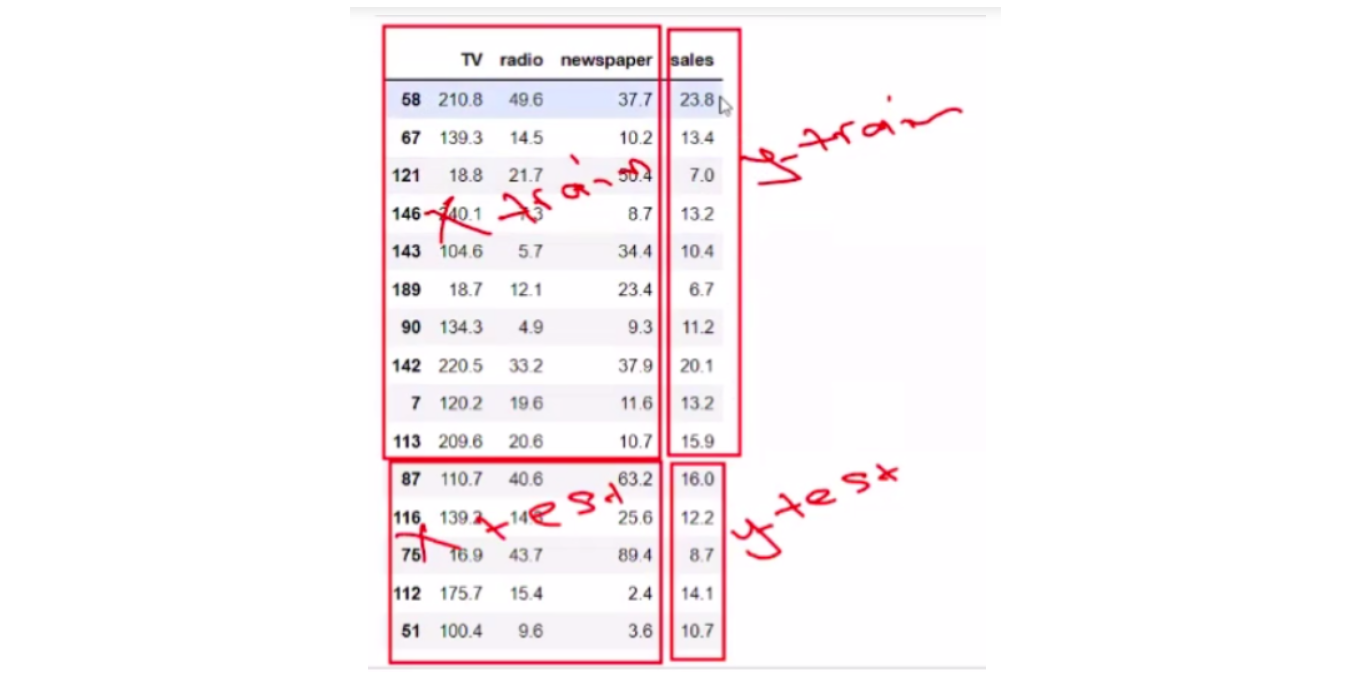

In [35]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))
# train ve test veri kümelerinin features ların  shape lerini yazdırır

X Train features shape: (140, 3)
y Train features shape: (140,)
X Test features shape : (60, 3)
Y Test features shape : (60,)


In [36]:
# üstteki kopda alternatif oalrak shape lere bakmak iin:
#Print("Train features shape: ", X_train.shape)
#Print("Train target shape: ", y_train.shape)
#Print("Test features shape: ", X_test.shape)
#Print("Test target shape: ", y_test.shape)

In [37]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [38]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

In [39]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [40]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
195     7.6
29     10.5
19     14.6
143    10.4
86     12.0
114    14.6
173    11.7
5       7.2
126     6.6
117     9.4
73     11.0
140    10.9
98     25.4
172     7.6
96     11.7
Name: sales, dtype: float64

# Model Fitting and Compare Actual and Predicted Labels

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()

#variable olarak atanmazsa ileride hatalar alınabilir.

In [43]:
model.fit(X_train,y_train) #train dataseti üzerinde eğitim gerçekleşiyor

LinearRegression()

In [44]:
model.coef_ #katsayıları getirir modeldeki

array([0.04405928, 0.1992875 , 0.00688245])

In [45]:
model.feature_names_in_ # featurelar teyit edilebilir bu şekilde

array(['TV', 'radio', 'newspaper'], dtype=object)

In [46]:
model.intercept_ # modeldeki sabit sayıyı verir

2.7089490925159083

In [47]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [48]:
# herhangi bir satırdaki değerleri tahmin edelim. manuel olarak y_pred hesabı yapalım
# bu deger y_test kumesindeki 95.satır oaln 16.9 gercek degerin manuel olarak tahmin hesabı yapılmış hali olacaktır

sum(X_test.loc[95]*model.coef_) + model.intercept_

16.565396297434837

In [49]:
#actual: gerçek degerler    # pred: tahmin edilen değerler     residual: gerçek değer - tahmin değeri

my_dict = {"Actual": y_test, "pred": y_pred, "residual":y_test - y_pred}

In [50]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [51]:
# comparison isimli dataframe den örnek olark 25 tane çekelim
result_sample = comparing.head(25)
result_sample

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


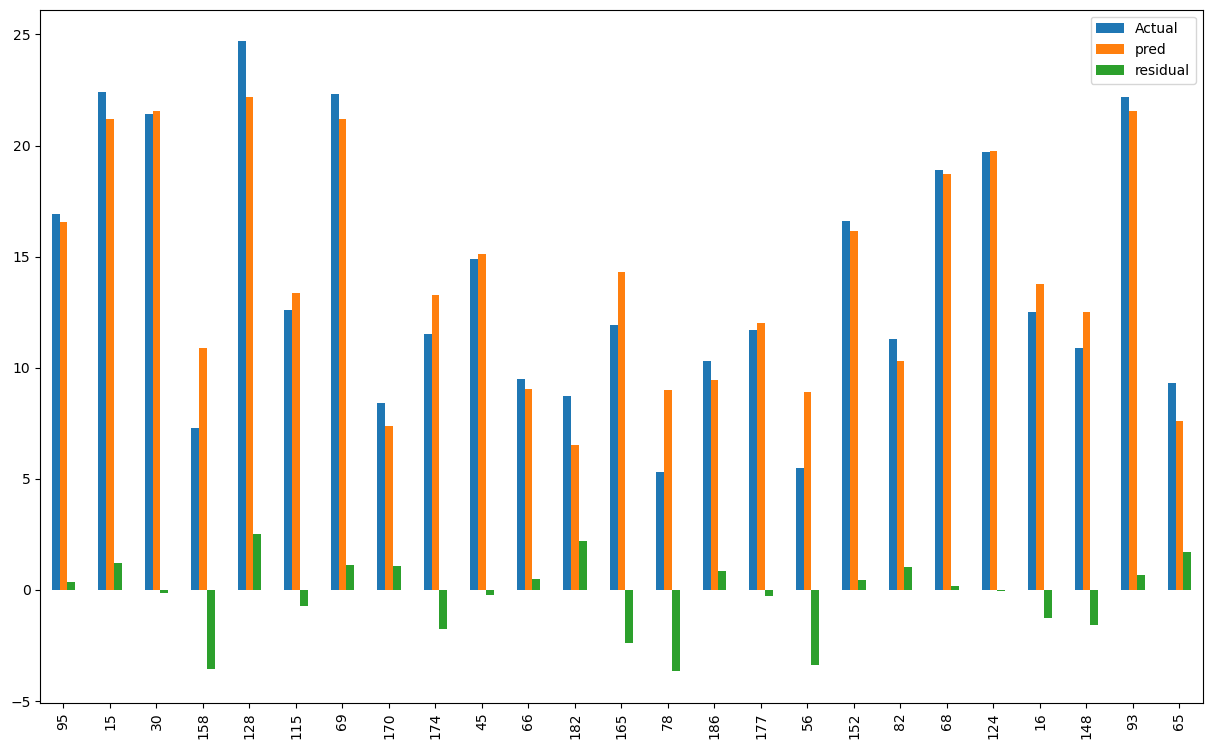

In [52]:
result_sample.plot(kind ="bar", figsize =(15,9))
plt.show();

# Error Metrics

In [53]:
# performans değerlkendirme için kullanacağımız error metrikleri
# RMSE degerini manuel hesaplayacağız

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [54]:
mse = mean_squared_error(y_test, y_pred)
mse

3.796797236715219

In [55]:
# Root Mean Squared Error - RMSE  hesabı
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

1.9485372043446385

In [56]:
#ortalama hata oranı

In [57]:
sales_mean = df["sales"].mean()
sales_mean

14.0225

In [58]:
#MAE oranı-0'a yakın olması modeli iyi bir model olduğunu gösterir. 

mae / sales_mean



NameError: name 'mae' is not defined

In [ ]:
#rms hata oranı--- 0'a yakın olması modeli iyi bir model olduğunu gösterir. 

rmse / sales_mean

NRMSE değeri 0.13, modelinizin yaptığı hatanın, satışlarınızın ortalamasının %13'u kadar olduğunu gösterir. Yani, modelinizin tahminleri gerçek satış değerlerine oldukça yakındır ve bu hata oranı, satışlarınızın büyüklüğüne kıyasla küçük bir hata oranıdır.

# Adjusted R2 Score (düzeltilmiş R2 degeri)

n = gözlem sayım (data noktası sayısı) 
p = feature

Adjusted R2 = 1 - [(1 - R2) * (n - 1) / (n - p - 1)]   feature selection yapılınca çıkan r2 

In [59]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)    #R2 scor
    n = df.shape[0]      # number of observations gözlem
    p =df.shape[1]-1    # number of indep. variable = feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [60]:
adj_r2(y_test,y_pred,df)

0.8588182832335934

 önceki R2=0,86 idi.. bu adjusted_r2 degeri öncekine çok yakın çıktı.
çünkü zaten 3 feature vardı
alttkai örnemkte feature sayısını abartılı vererek adusted _r2 etkisini gçrelim

# Evaluation Model

In [ ]:
# modelin genel degerlendirilmesini bu etapta yapacagız

In [61]:
# Error metricleri hesaplayan ve yazan kod blogu
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [62]:
eval_metric(y_test,y_pred)

#test datasına ait error metrikleri

Model testing performance: 
---------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549082
MSE 		: 3.796797236715219
RMSE 		: 1.9485372043446385


overfitting kontrolü için train datasındaki r2'yi bulalım ve yukarıdaki test datasının r2 değeri olan 0,86 değeri ile karşılaştırlım

In [63]:
# x_train değerlerini prediction yapacağız

y_train_pred = model.predict(X_train)

In [64]:
eval_metric(y_train,y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072528
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


In [ ]:
# burada overfitting açısından değerlendirme yapılacaktır.
# 0.90 ve 0.86 train ve test R2 değerleridir ve birbirine yakın değerlerdir. overfitting olmadığı yönünde değerlendirme yapılabilir.
# sadece bu değerlere bakılarak değerlendirme yapılamaz.


## plotting residual

In [65]:
residuals = y_test - y_pred

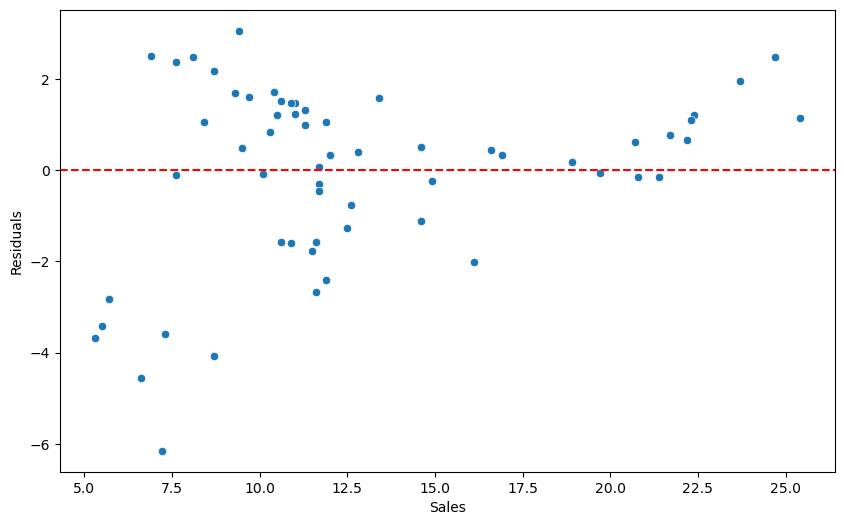

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= y_test, y=residuals)
plt.xlabel("Sales")
plt.ylabel("Residuals")
plt.axhline(y=0, color = "r", linestyle ="--" )
plt.show()

In [67]:
# residual dağılımnda bir pattern oluşursa sistematik bir hatadan bahsedilebilir.

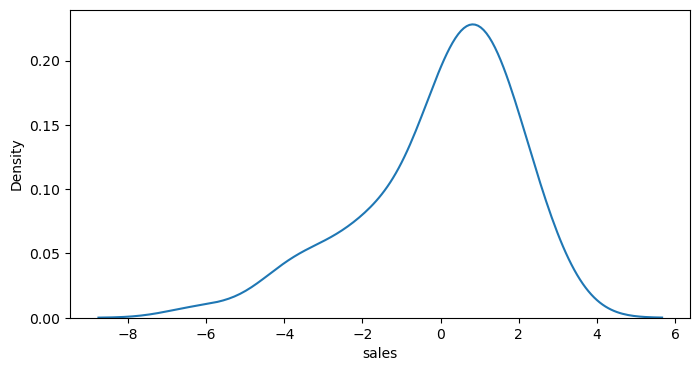

In [68]:
sns.kdeplot(residuals);

In [ ]:
# burada normal bir dağılım olmuş. nature yani. istenilen bir durumdur bu

((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([-6.15360735, -4.5531472 , -4.07770578, -3.67026042, -3.58923816,
         -3.41549403, -2.81412012, -

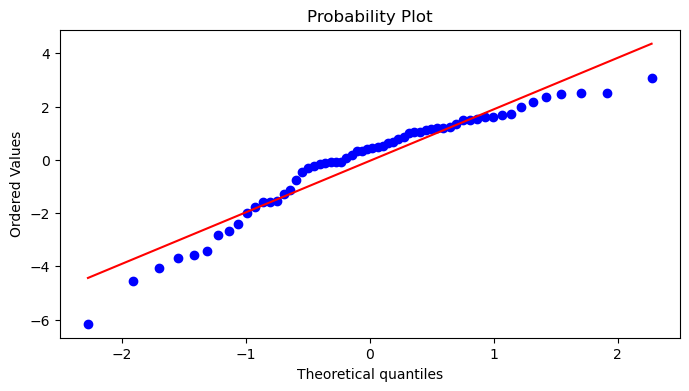

In [69]:
stats.probplot(residuals, dist = "norm", plot = plt)

In [ ]:
#çizgi üzerinde noktalar(residual) varsa normal dağılımından bahsedilir. sorun olmadığı anlamına gelir.

In [70]:
skew(residuals)

-0.9865673346742727

In [71]:
!pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/282.6 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/282.6 kB 217.9 kB/s eta 0:00:02
   ------------ -------------------------- 92.2/282.6 kB 327.7 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/282.6 kB 327.7 kB/s eta 0:00:01
   ------------ -------------------------- 92.2/282.6 kB 327.7 kB/s eta 0:00:01
   ----------------------- -------------- 174.1/282.6 kB 455.1 kB/s eta 0:00:01
   ----------------------- -------------- 174.1/282.6 kB 455.1 kB/s eta 0:00:01
   --------------------------- ---------- 204.8/282.6 kB 429.5 kB/s eta 0:

In [72]:
from yellowbrick.regressor import ResidualsPlot

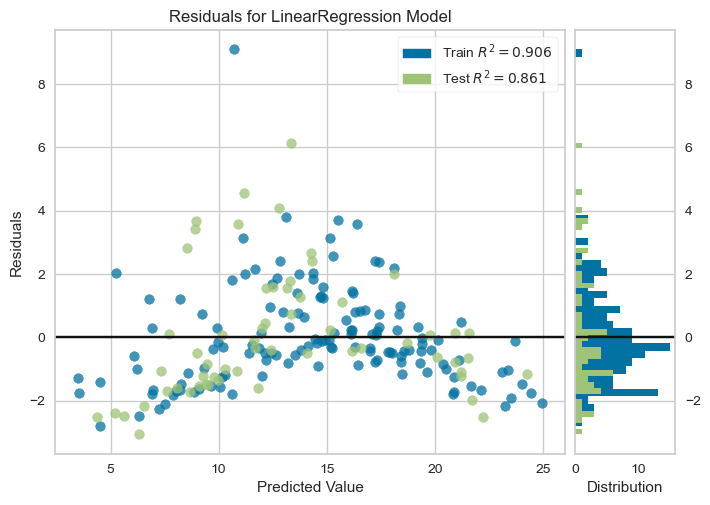

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [73]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [ ]:
#R2 ler %10'dan uzak değil. overfitting yok
#residual dağılımında bir pattern yok. normal dağılım var yani. sistematik bir hata yoktur yani. rastgele
#bu grafik yukarıdaki grafiklere ihtiyaç bırakmadan fikir verir.

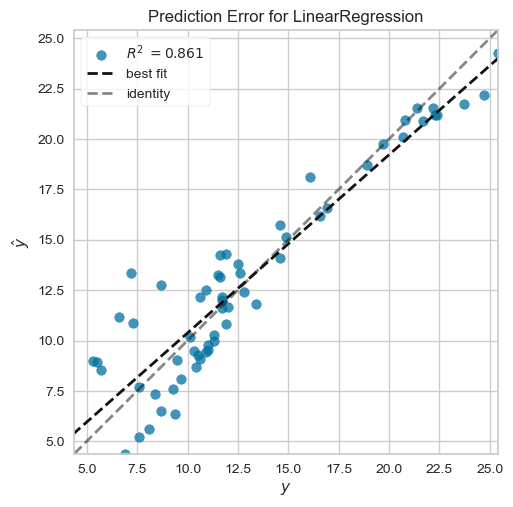

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [74]:
# overfitting kontrolünde 2. aşama

from yellowbrick.regressor import PredictionError
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure


In [ ]:
# tahminler mükemmel olsaydı gri çizgi üzerinde mavi noktalar olmalıydı.
#burada mavi noktalar gri çizgiye yakın, bazıları da sapmış bu ise bazılarında modelin hata yaptığını gösterir.

## Final Model

In [80]:
#artık hangi algoritma kullanılacağına karar verilmiştir.
# bu aşamada tüm data setini tekrar fit edeceğiz train test bölmeden
final_model = LinearRegression()
final_model.fit(X,y) # train,test aşaması bitti. tüm datayı fitliyoruz

LinearRegression()

In [81]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [82]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [83]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [86]:
final_model.intercept_

# y = 0.04*TV + 0.188*radio -0.001*newspaper + 2.9

2.9388893694594085

## Prediction on Final Model

TV: 150 Radio:20 News:15 değerleri için prediction yapalım

In [87]:
adv=[[150,20,15]]

In [88]:
final_model.predict(adv)

array([13.55862413])